In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv(r"boston.csv")
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [10]:
class LinearRegression:
    ''' 使用 python 实现梯度下降线性回归算法
    '''
    def __init__(self , alpha , times):
        ''' 初始化方法
        Parameters
        ----
        alpha : float 
            学习率。用来控制步长（权重调整的幅度）
        times : int
            循环迭代的次数
        '''
        self.alpha = alpha
        self.times = times
    def fit(self,X,y):
        ''' 跟进提供的训练数据，对模型进行训练
        Parameters
        ----
        X: 类数组类型。形状[样本数量，特征数量]
            带训练的样本特征属性（特征矩阵）
        y: 类数组类型。形状[样本数量]
            目标值（标签信息）
        '''
        X = np.asarray(X)
        y = np.asarray(y)
        # 创建权重的向量，初始值为0（或任意值），长度比特征数量多1(多出的即为截距)
        self.w_ = np.zeros(1 + X.shape[1])
        # 创建损失列表 （梯度下降法就是通过迭代，调整权重值，让损失值最小）
        # 损失值计算 ： （预测值 - 真实值）** 2 的平方和 除以 2 
        self.loss_ = []
        #  进行循环，多次迭代，在每次迭代过程中，调整权重使损失值不断减少
        for i in range(self.times):
            # 计算预测值
            y_hat = np.dot(X , self.w_[1:]) + self.w_[0]
            # 计算真实值与预测值的差距
            error = y - y_hat
            # 将损失值加入到损失列表中
            self.loss_.append(np.sum(error ** 2) / 2)
            # 根据差距调整权重w_，根据公式，调整为权重（j） = 权重（j）+ 学习率 * sum((y - y_hat) * x (j))
            self.w_[0] += self.alpha * np.sum(error)
            self.w_[1:] += self.alpha * np.dot(X.T,error)
            
    def predict(self,X):
        ''' 根据参数传递的样本，对样本数据进行预测
        Parameters 
        ---
        X: 类数组类型。形状[样本数量，特征数量]
            待测试的样本
        Returns
        -----
        result: 数组类型
            预测的结果
        '''
        X = np.asarray(X)
        result = np.dot(X, self.w_[1:]) + self.w_[0]
        return result


In [19]:
lr = LinearRegression(alpha = 0.0005 , times = 20)
t = data.sample(len(data),random_state = 0)
train_X = t.iloc[:400,:-1]
train_y = t.iloc[:400,-1]
test_X = t.iloc[400:,:-1]
test_y = t.iloc[400:,-1]

lr.fit(train_X,train_y)
result = lr.predict(test_X)
display(np.mean((result - test_y)  ** 2 ))

# display(lr.w_)
# display(lr.loss_)

2.5268413180922577e+194

In [14]:
class StandardScaler:
    ''' 对数据进行标准化处理（符合正态分布的形式）均值为0 标准差为1
    '''
    def fit(self,X):
        ''' 根据传递的样本，计算每个特征列的均值与标准差
        Parameters
        ----
        X : 类数组类型
            训练数据，用来计算均值与标准差
            
        '''
        X = np.asarray(X)
        self.std_ = np.std(X , axis = 0)
        self.mean_ = np.mean(X, axis = 0)
        
    def transform(self,X):
        ''' 对给定的数据X 进行标准化处理（将X的每一列都变成标准正太分布的数据）
        Parameters
        ---
        X： 类数组类型
            待转换的数据
            
        Returns
        ----
        result : 类数组类型
            参数X转换成标准正态分布后的结果
        '''
        return (X - self.mean_) / self.std_
    
    def fit_transform(self, X):
        ''' 对数据进行训练，并转换，返回转换之后的结果
        Parameters
        -----
        X： 类数组类型
            待转换的数据
        Returns
        ---
        result: 类数组类型
            参数X 转换成标准正态分布后的结果
        '''
        self.fit(X)
        return self.transform(X)

In [46]:
# 为避免每个特征数量级的不同，从而在梯度下降过程中带来影响， 需要对每个特征进行标准化处理
lr = LinearRegression(alpha = 0.0005 , times = 20)
t = data.sample(len(data),random_state = 0)
train_X = t.iloc[:400,:-1]
train_y = t.iloc[:400,-1]
test_X = t.iloc[400:,:-1]
test_y = t.iloc[400:,-1]
# 对数据进行标准化处理
s = StandardScaler()
train_X = s.fit_transform(train_X)
test_X = s.transform(test_X)

s2 = StandardScaler()
train_y = s2.fit_transform(train_y)
test_y = s2.transform(test_y)

lr.fit(train_X,train_y)
result = lr.predict(test_X)
# display(np.mean((result - test_y)  ** 2 ))
# display(lr.w_)
# display(lr.loss_)

In [47]:
import matplotlib as mpl
import matplotlib.pyplot as plt
# 默认情况下 matplotlib 不支持中文显示，设置任意支持中文的字体即可
mpl.rcParams['font.sans-serif'] = 'WenQuanYi Micro Hei'

# 设置中文字体中正常显示负号（-）。即不适用 unicode 中的 “-” 展示
mpl.rcParams["axes.unicode_minus"] = False

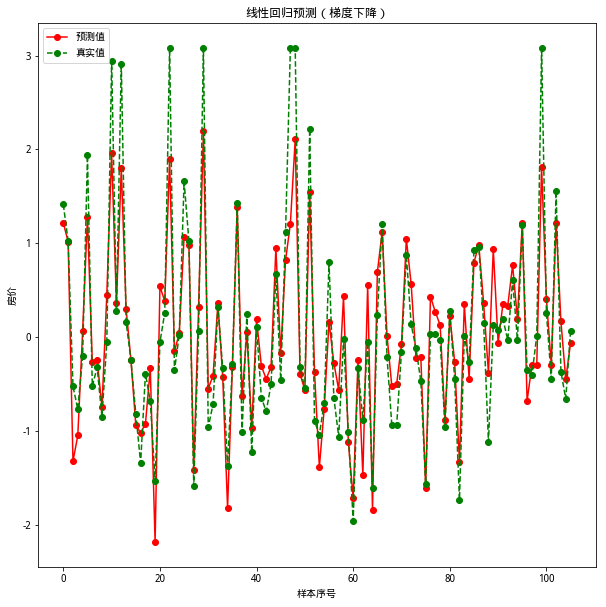

In [48]:
plt.figure(figsize = (10,10))
# 绘制预测值
plt.plot(result,"ro-",label = "预测值")
plt.plot(test_y.values,"go--",label = "真实值")
plt.title("线性回归预测（梯度下降）")
plt.xlabel("样本序号")
plt.ylabel("房价")
# 设置图例
plt.legend(loc="best")
plt.show()

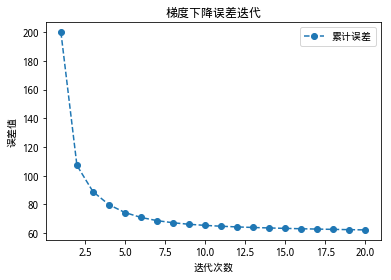

In [49]:
# 绘制累计误差值
plt.plot(range(1,lr.times + 1), lr.loss_ ,"o--",label = "累计误差")
# 设置图例
plt.title("梯度下降误差迭代")
plt.xlabel("迭代次数")
plt.ylabel("误差值")
plt.legend(loc="best")
plt.show()


In [69]:
# 因为房价分析涉及多个维度，为实现可视化，只选取其中的一个维度（RM），画出直线，实现拟合
lr = LinearRegression(alpha = 0.0005,times = 50)
t = data.sample(len(data), random_state = 0)
train_X = t.iloc[:400,5:6]
train_y = t.iloc[:400,-1]
test_X = t.iloc[400:,5:6]
test_y = t.iloc[400:,-1]

# 对数据进行标准处理
s = StandardScaler()
train_X = s.fit_transform(train_X)
test_X = s.transform(test_X)

s2 = StandardScaler()
train_y = s2.fit_transform(train_y)
test_y = s2.transform(test_y)

lr.fit(train_X, train_y)
result = lr.predict(test_X)
display(np.mean((result - test_y) ** 2))

0.46071758937162166

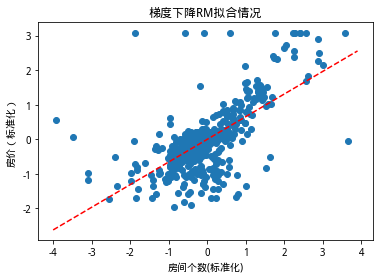

In [78]:
plt.scatter(train_X["RM"],train_y)
# 查看方程系数
# display(lr.w_)
# 构建方程 y = -3.07753822e-16 +  6.54984608e-01 * x
x = np.arange(-4,4,0.1)
y = -3.07753822e-16 +  6.54984608e-01 * x
plt.plot(x,y,"r--")
# plt.plot(x,lr.predict(x.reshape(-1, 1)),"bo--")
# 设置图例
plt.title("梯度下降RM拟合情况")
plt.xlabel("房间个数(标准化)")
plt.ylabel("房价（标准化）")

plt.show()


In [77]:
%magic